In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [36]:
iris = pd.read_csv("IRIS.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
iris.shape

(150, 5)

In [39]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [40]:
iris.duplicated().sum()

3

In [42]:
#Dropping the duplicated values
iris.drop_duplicates(inplace=True)

In [43]:
iris.duplicated().sum()

0

In [44]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [45]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [47]:
iris_outcome = pd.crosstab(index = iris['species'], columns= 'count')
iris_outcome

col_0,count
species,
Iris-setosa,48
Iris-versicolor,50
Iris-virginica,49


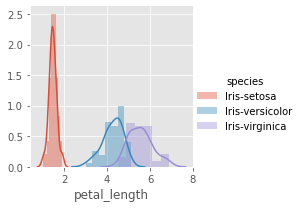

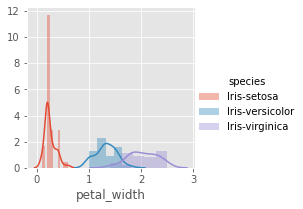

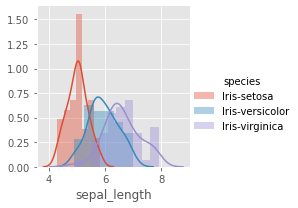

In [48]:
sns.FacetGrid(data = iris , hue= 'species' , size =3).map(sns.distplot , "petal_length").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

<AxesSubplot:xlabel='species', ylabel='petal_length'>

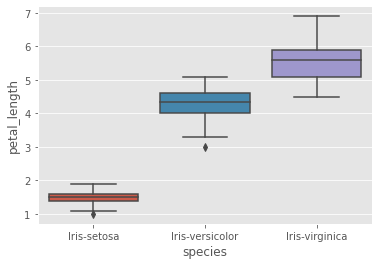

In [50]:
sns.boxplot(x="species",y="petal_length",data=iris)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

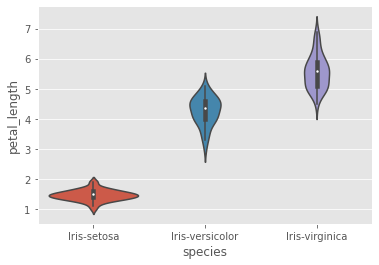

In [51]:
sns.violinplot(x='species' , y = 'petal_length' , data = iris)

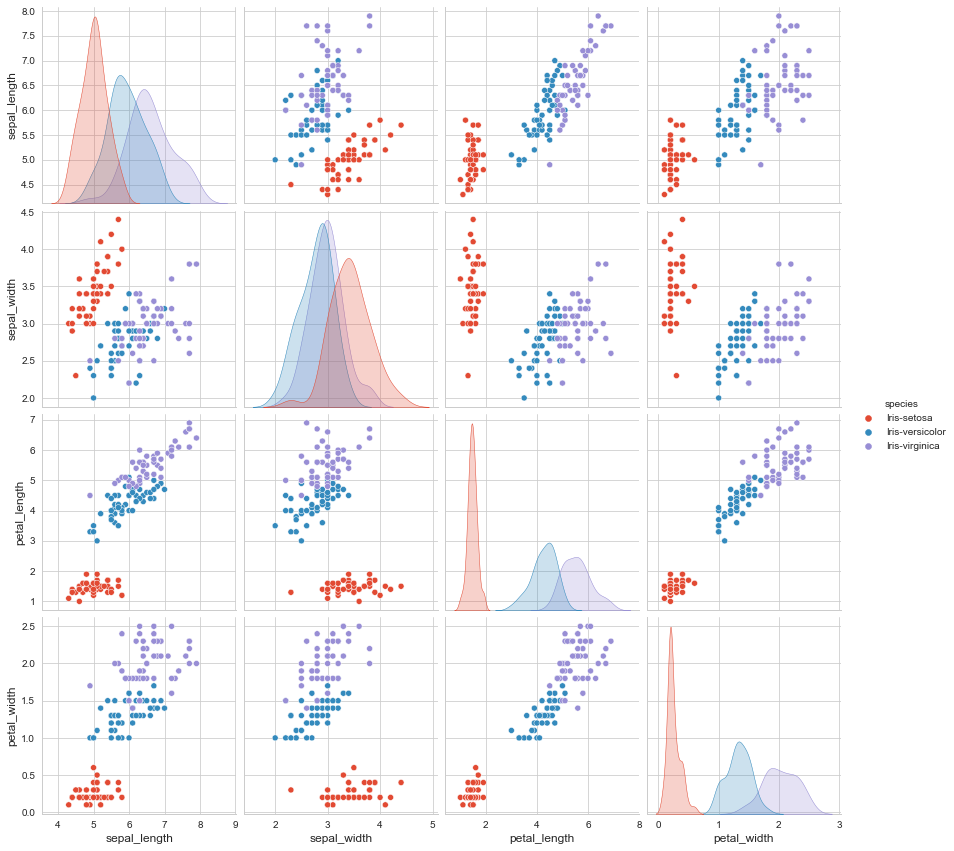

In [52]:
sns.set_style('whitegrid')
sns.pairplot(iris,hue="species",size=3);
plt.show()

## KMeans

In [69]:
x = iris.iloc[: , 0:3].values
x

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3, 1.3],
       [4.4, 3.2, 1.3],
       [5. , 3.5

In [70]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#### Using the elbow method to determine the optimal number of clusters for k-means clustering

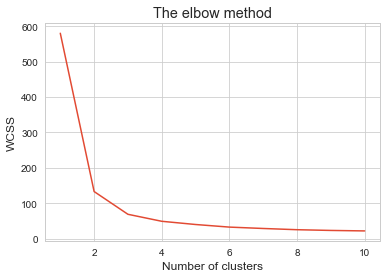

In [71]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

### Implementing K-Means Clustering

In [72]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

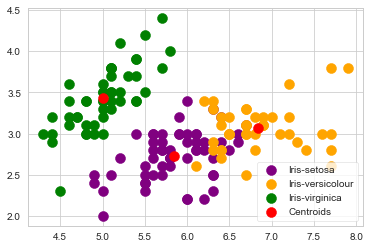

In [73]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

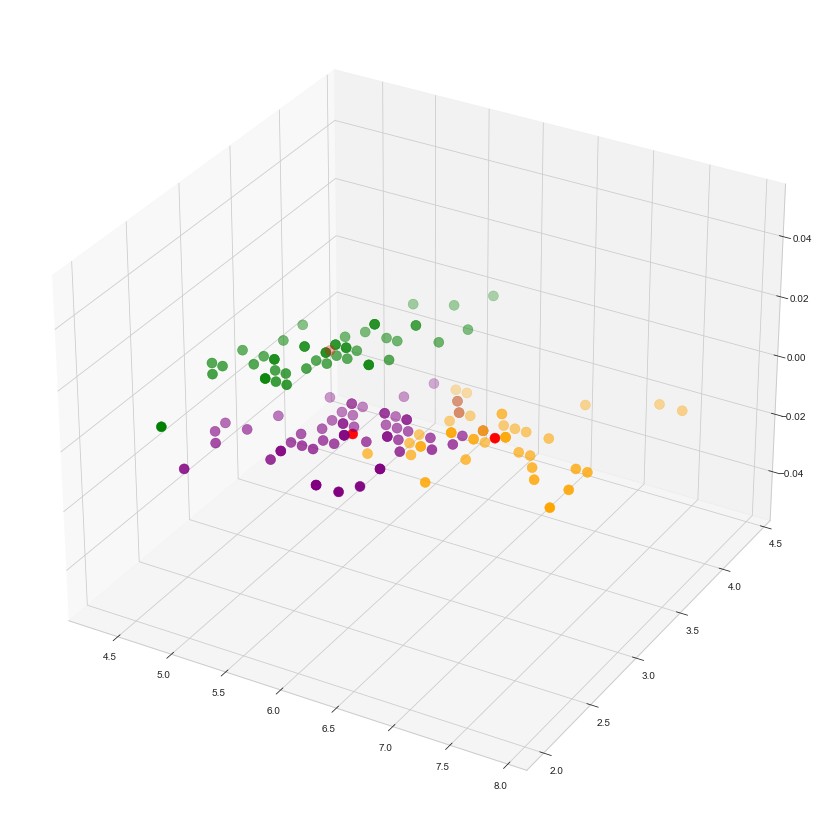

In [74]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [78]:
score = silhouette_score(x, y_kmeans, metric='euclidean')
score

0.5475534115362761

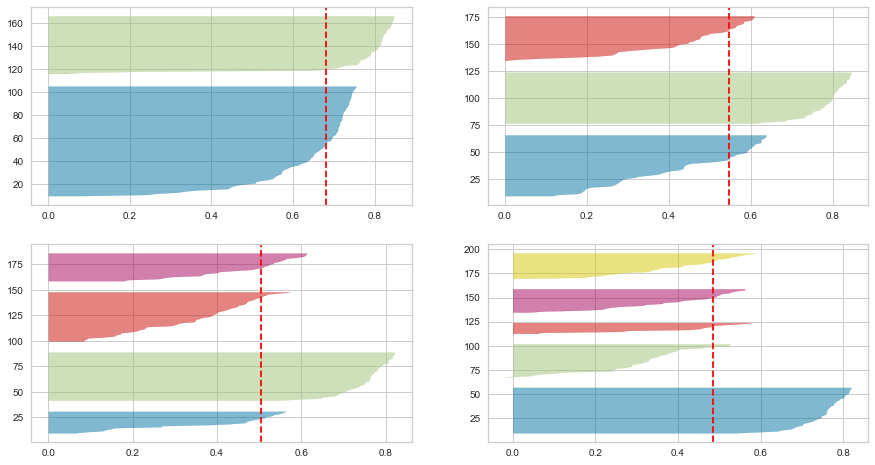

In [83]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    
    #Create KMeans instance for different number of clusters

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)


    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x) 

>The value of n_clusters as 4 and 5 looks to be suboptimal for the given data due to the following reasons:
Presence of clusters with below average silhouette scores
Wide fluctuations in the size of the silhouette plots.
>>The value of 2 and 3 for n_clusters looks to be optimal one. The silhouette score for each cluster is above average silhouette scores. Also, the fluctuation in size is similar. The thickness of the silhouette plot representing each cluster also is a deciding point. For plot with n_cluster 3 (top right), the thickness is more uniform than the plot with n_cluster as 2 (top left) with one cluster thickness much more than the other. Thus, one can select the optimal number of clusters as 3.